In [2]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
from pandas import ExcelWriter
from pandas import ExcelFile

In [3]:
#Removing warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
StateResidence = pd.read_excel("data/snapshot_clean.xlsx", sheet_name = 0 )
StateResidence.head()

,Year,State,Population
0,1966,New South Wales,4237900
1,1991,New South Wales,5714974
2,2006,New South Wales,6549174
3,2011,New South Wales,6917656
4,2016,New South Wales,7480228


In [5]:
StateResidence.dtypes

Year           int64
State         object
Population     int64
dtype: object

In [8]:
SR_clean = StateResidence[StateResidence.State != 'Total']

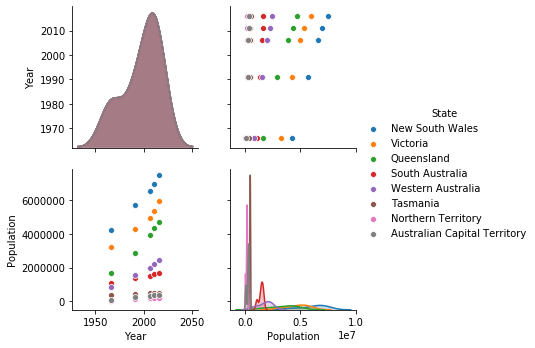

In [9]:
g = sns.pairplot(SR_clean, hue= 'State')

In [11]:
AgeSex = pd.read_excel("data/snapshot_clean.xlsx", sheet_name = 2 )
AgeSex.head()

,Year,Gender,Median age,0-4 years,5-9 years,10-14 years,15-19 years,20-24 years,25-29 years,30-34 years,...,45-49 years,50-54 years,55-59 years,60-64 years,65-69 years,70-74 years,75-79 years,80-84 years,85 years and over,Total
0,2011,Males,36,729969,694561,703308,722378,741120,754466,719654,...,740962,711741,637839,597885,455420,342691,252930,188242,139162,10634014
1,2011,Females,38,691079,657360,667746,683420,719555,758771,734122,...,763180,735662,659406,608231,463899,365398,292333,248695,263518,10873705
2,2011,Persons,37,1421050,1351921,1371054,1405798,1460674,1513236,1453775,...,1504143,1447404,1297244,1206116,919319,708090,545263,436937,402681,21507719
3,2016,Males,37,752142,771055,717629,727677,795423,824084,839821,...,773170,748954,709115,632357,581230,431325,307441,204026,180351,11546638
4,2016,Females,38,712638,731592,679553,693915,771369,840525,864026,...,808282,774601,745214,667048,607766,456390,345217,256529,306494,11855248


In [17]:
AgeSex.columns

Index(['Year', 'Gender', 'Median age', '0-4 years', '5-9 years', '10-14 years',
       '15-19 years', '20-24 years', '25-29 years', '30-34 years',
       '35-39 years', '40-44 years', '45-49 years', '50-54 years',
       '55-59 years', '60-64 years', '65-69 years', '70-74 years',
       '75-79 years', '80-84 years', '85 years and over', 'Total'],
      dtype='object')

In [22]:
AS_clean  = AgeSex.drop(['Median age','Total'],axis = 1)
AS_clean.shape


(6, 20)

In [27]:
AS_clean.dtypes

Year                  int64
Gender               object
0-4 years             int64
5-9 years             int64
10-14 years           int64
15-19 years           int64
20-24 years           int64
25-29 years           int64
30-34 years           int64
35-39 years           int64
40-44 years           int64
45-49 years           int64
50-54 years           int64
55-59 years           int64
60-64 years           int64
65-69 years           int64
70-74 years           int64
75-79 years           int64
80-84 years           int64
85 years and over     int64
dtype: object

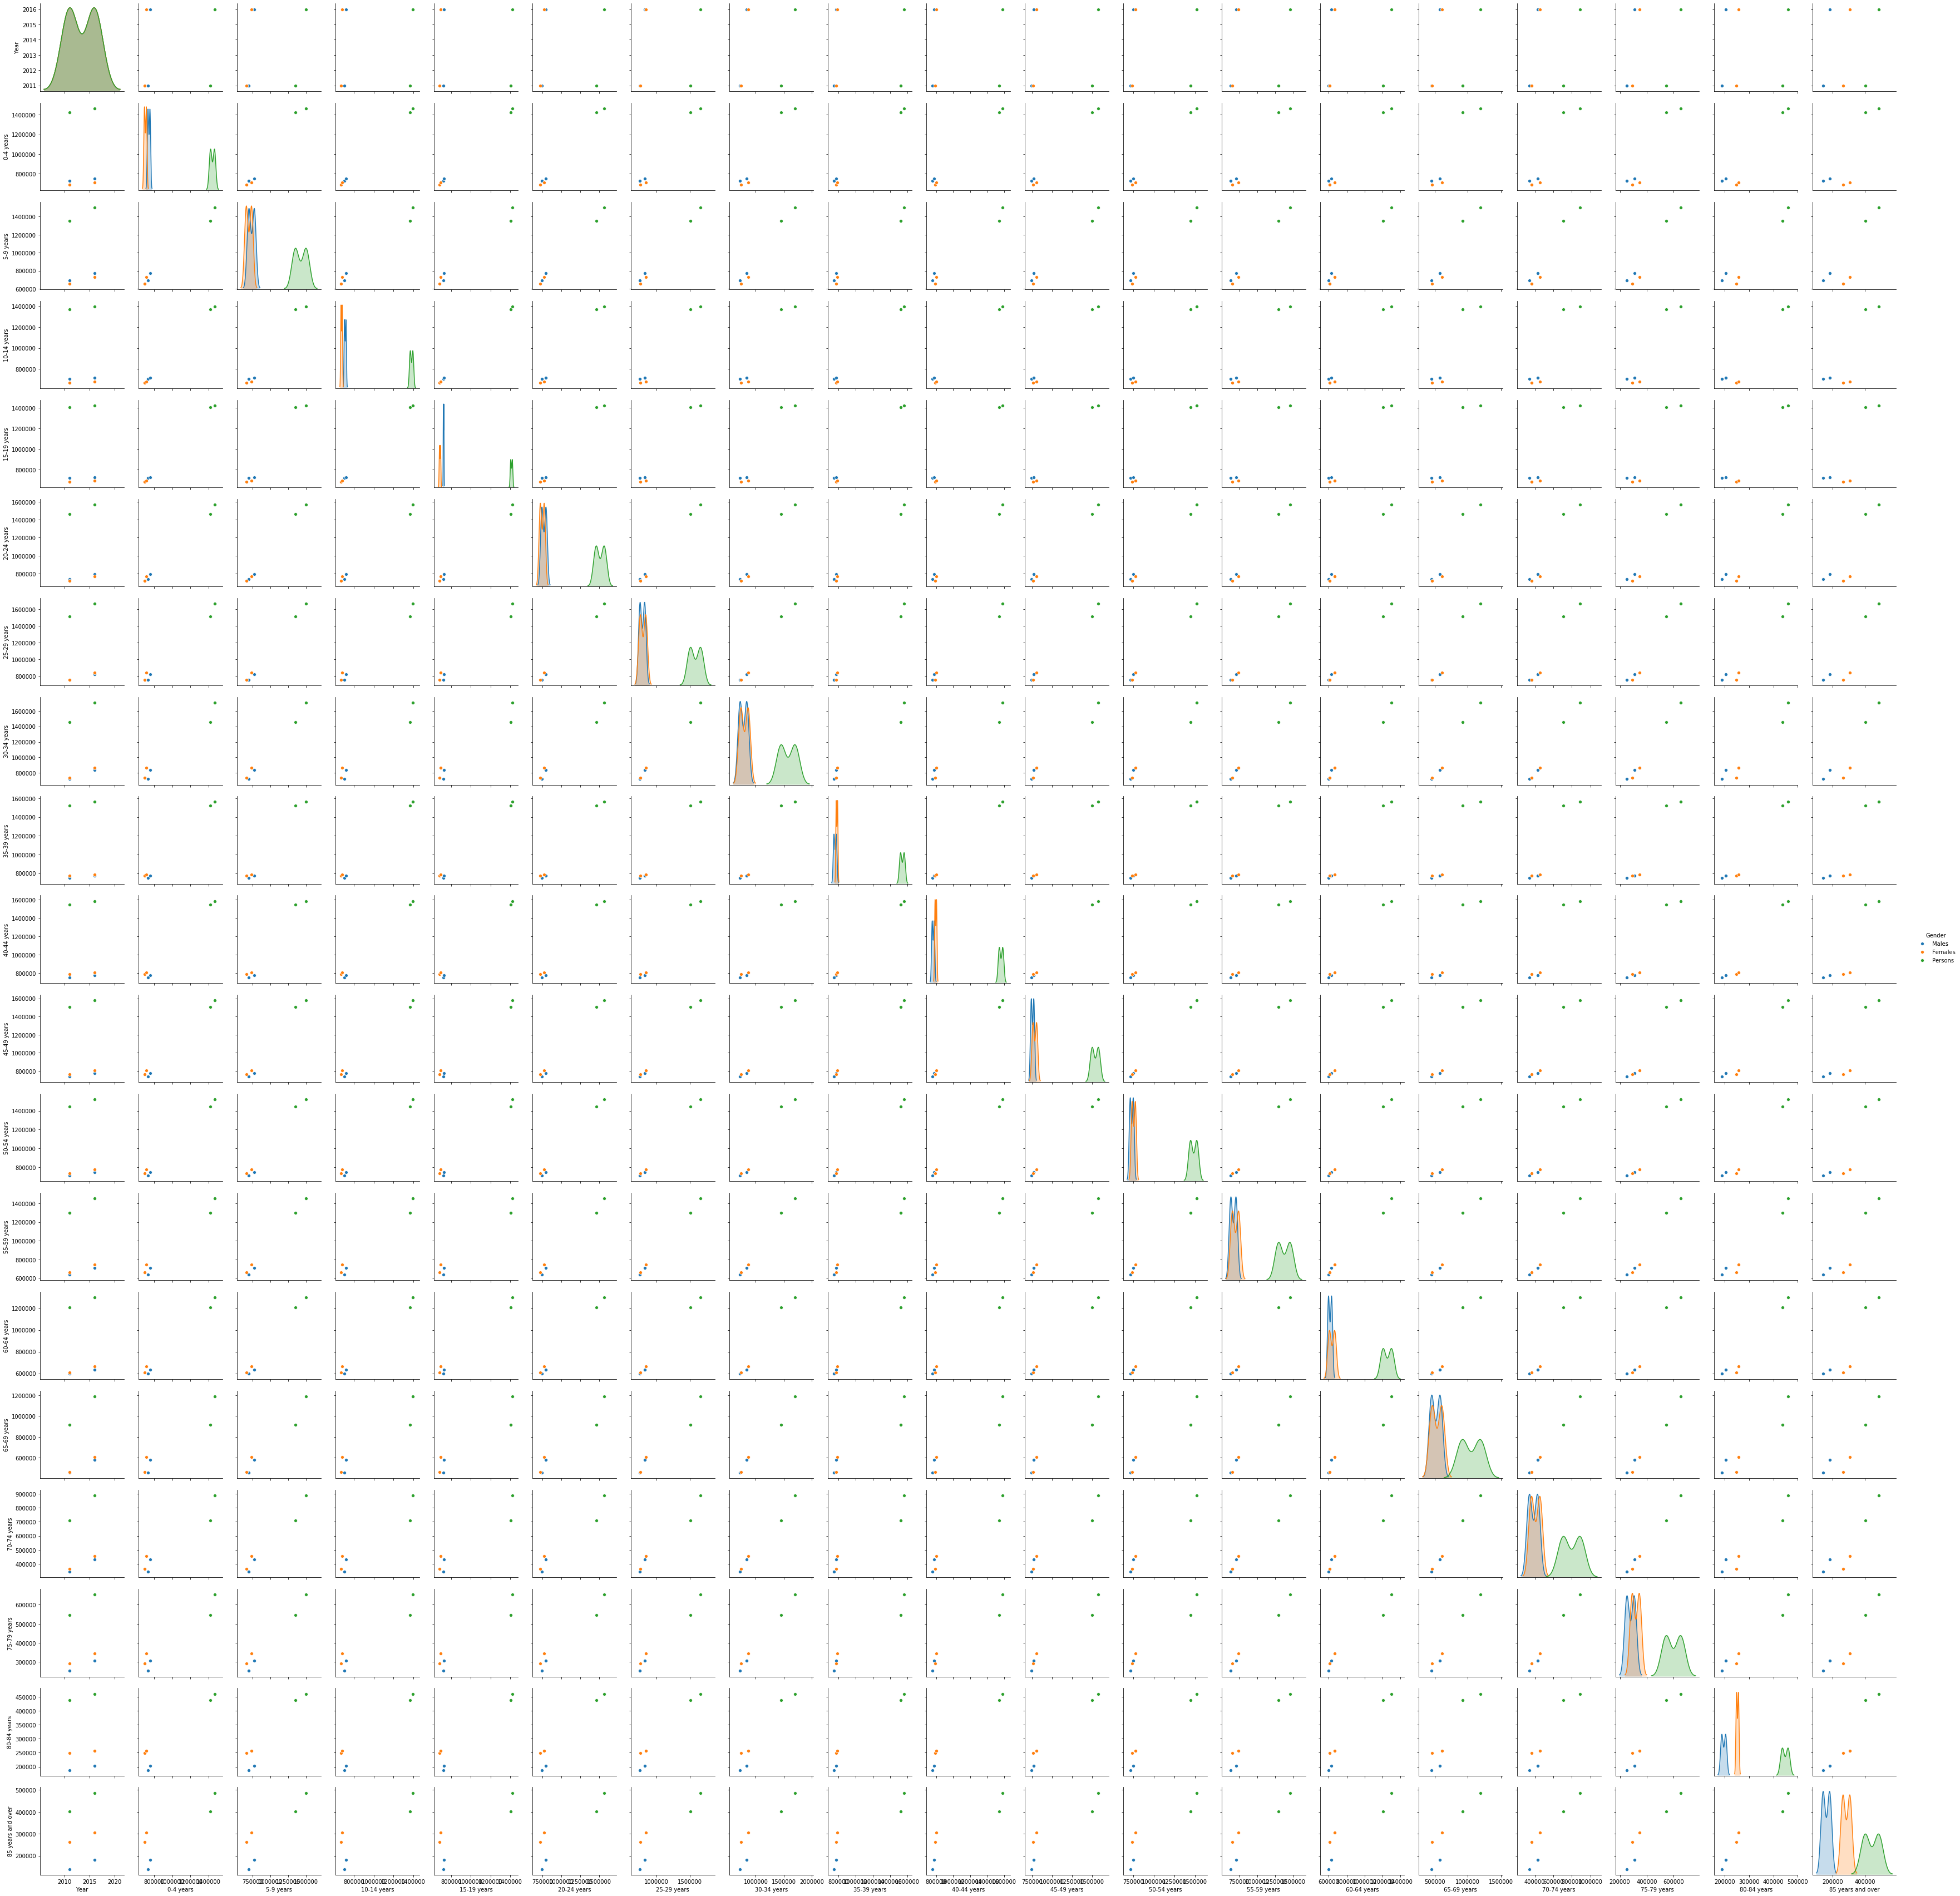

In [30]:
g =  sns.pairplot(AS_clean, hue = 'Gender')

In [11]:
IngeniseStat = pd.read_excel("data/snapshot_clean.xlsx", sheet_name = 4 )
IngeniseStat.head()

,Age,Year,Aboriginal and Torres Strait Islander people(b),Non-Indigenous people,Indigenous status not stated,Total
0,Median age,2011,21,38,36,37
1,0-4 years,2011,67416,1282736,70897,1421050
2,5-9 years,2011,64936,1222114,64873,1351921
3,10-14 years,2011,64737,1241796,64529,1371054
4,15-19 years,2011,59200,1282020,64577,1405798


In [12]:
country = pd.read_excel("data/snapshot_clean.xlsx", sheet_name = 6 )
country.head()

,Area,New South Wales,Victoria,Queensland,South Australia,Western Australia,Tasmania,Northern Territory,Australian Capital Territory
0,Adelie Land (France),0,0,0,0,0,0,0,0
1,Afghanistan,13032,18116,3381,6313,5120,302,63,471
2,Aland Islands,4,5,4,4,0,0,0,0
3,Albania,315,1681,257,375,198,9,12,20
4,Algeria,584,302,234,63,139,7,18,47


In [13]:
HouseCompos = pd.read_excel("data/snapshot_clean.xlsx", sheet_name = 10 )
HouseCompos.head()

,State,One family households,Multiple family households,Total family households,Group households,Lone person households,Total households,Year
0,New South Wales,1426810,16745,1443555,88566,386439,1918560,1991
1,Victoria,1072422,10423,1082845,62427,290091,1435363,1991
2,Queensland,728631,6405,735036,47018,182389,964443,1991
3,South Australia,370091,2284,372375,19093,110432,501900,1991
4,Western Australia,396766,2979,399745,25134,103484,528363,1991


In [20]:
PreHouse = pd.read_excel("data/snapshot_clean.xlsx", sheet_name = 12 )
PreHouse.head()

,State,Average no. of people per household,Year
0,New South Wales,2.8,1991
1,New South Wales,2.6,2016
2,Victoria,2.8,1991
3,Victoria,2.6,2016
4,Queensland,2.8,1991


In [21]:
FamilyCompos = pd.read_excel("data/snapshot_clean.xlsx", sheet_name = 15 )
FamilyCompos.head()

,Unnamed: 0,Year,Couple families with children,Couple families without children,Total
0,Male same-sex couples,2011,502,17081,17583
1,Female same-sex couples,2011,3581,12551,16132
2,Total same-sex couples,2011,4083,29632,33715
3,Opposite-sex couples,2011,2530318,2120670,4650988
4,Male same-sex couples,2016,1067,22676,23741


In [22]:
DewlingStruct = pd.read_excel("data/snapshot_clean.xlsx", sheet_name = 17 )
DewlingStruct.head()

,State,Separate house,"Semi-detached, row or terrace house, townhouse etc.",Flat or apartment,Total households,Year
0,Australian Capital Territory,94266,18810,16071,129425,2011
1,Australian Capital Territory,95520,25278,21404,142664,2016
2,New South Wales,1717699,263926,465189,2471299,2011
3,New South Wales,1729820,317447,519380,2604314,2016
4,Northern Territory,41188,6880,10084,60891,2011


In [23]:
Tenure = pd.read_excel("data/snapshot_clean.xlsx", sheet_name = 18 )
Tenure.head()

,State,Owned outright,Owned with a mortgage,Rented,Total Dwellings,year
0,Australian Capital Territory,22770,35190,29771,90258,1991
1,Australian Capital Territory,38555,54832,45346,142664,2016
2,New South Wales,818215,487459,525542,1918560,1991
3,New South Wales,839665,840004,826922,2604314,2016
4,Northern Territory,5867,10788,23682,44616,1991
